# Time analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing and understanding database

In [2]:
crimes = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Crimes_-_2015_to_2020.csv")

In [3]:
crimes.head(20)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,12.0,61.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,0,0,1511,15.0,29.0,25.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,1,0,1412,14.0,35.0,21.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,0,1,1522,15.0,28.0,25.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,0,0,614,6.0,21.0,71.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,2015-09-04 18:00:00,021XX W CHURCHILL ST,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,0,0,1434,14.0,32.0,24.0,2015,2018-02-10 15:50:01,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,2015-09-05 13:00:00,025XX W CERMAK RD,THEFT,RETAIL THEFT,GROCERY FOOD STORE,1,0,1034,10.0,25.0,31.0,2015,2015-09-17 11:37:18,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,2015-09-05 11:30:00,031XX W WASHINGTON BLVD,ROBBERY,STRONGARM - NO WEAPON,STREET,0,1,1222,12.0,27.0,27.0,2015,2018-02-10 15:50:01,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN


In [4]:
crimes.set_index(crimes.ID, inplace=True)

In [5]:
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1541733.0,NaN,NaN,NaN,11102325.804722,860134.560531,21714.0,10571765.0,11156741.0,11687324.0,12305810.0
Case Number,1541733,1541546,HZ140230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1541733,702137,2015-01-01 00:01:00,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,1541733,35135,001XX N STATE ST,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,1541733,35,THEFT,352089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1541733,492,SIMPLE,168057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,1535379,192,STREET,347634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1541733.0,NaN,NaN,NaN,0.206649,0.404902,0.0,0.0,0.0,0.0,1.0
Domestic,1541733.0,NaN,NaN,NaN,0.165116,0.371285,0.0,0.0,0.0,0.0,1.0
Beat,1541733.0,NaN,NaN,NaN,1143.751639,694.631456,111.0,612.0,1024.0,1712.0,2535.0


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
# Define "Date" and "Updated on" columns as datetime type
crimes.Date = pd.to_datetime(crimes.Date)
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])

crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Understanding the correlations between my numerical variables

In [16]:
crimes_date = crimes[["Primary Type","Date", "Year"]].copy()
crimes_date["Month"] = pd.DatetimeIndex(crimes["Date"]).month
crimes_date["Day"] = pd.DatetimeIndex(crimes["Date"]).day
crimes_date["Hour"] = pd.DatetimeIndex(crimes["Date"]).hour
crimes_date["Minutes"] = pd.DatetimeIndex(crimes["Date"]).minute
crimes_date

,Primary Type,Date,Year,Month,Day,Hour,Minutes
ID,,,,,,,
10224738,BATTERY,2015-09-05 13:30:00,2015,9,5,13,30
10224739,THEFT,2015-09-04 11:30:00,2015,9,4,11,30
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,0,1
10224740,NARCOTICS,2015-09-05 12:45:00,2015,9,5,12,45
10224741,ASSAULT,2015-09-05 13:00:00,2015,9,5,13,0
...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,17,0
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,0,0
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,0,0


<AxesSubplot:>

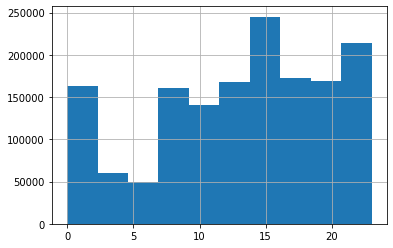

In [18]:
crimes_date["Hour"].hist()